In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
pd.set_option('display.max_columns', None)

In [132]:
df = pd.read_csv(r'C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering\gurgaon_properties_outlier_treated.csv')

In [133]:
df.shape

(3556, 24)

In [134]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,1848.0,Super Built up area 1848(171.68 sq.m.)Built Up...,4.0,4.0,3,1.0,NaN,Relatively New,1848.0,1600.0,1400.0,1,0,0,0,1,0,42,462.00
1,house,puri diplomatic greens,sector 111,9.00,11250.0,8000.0,Built Up area: 8000 (743.22 sq.m.),5.0,5.0,3+,3.0,North-East,Relatively New,NaN,8000.0,NaN,0,1,0,0,0,0,112,1600.00
2,flat,m3m skywalk,sector 74,2.25,12500.0,1800.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,3.0,3,5.0,North-East,Relatively New,2000.0,1900.0,1800.0,1,0,0,0,0,0,174,600.00
3,house,independent,sector 55,5.60,20741.0,2700.0,Plot area 300(250.84 sq.m.),6.0,4.0,3,3.0,East,Old Property,NaN,2700.0,NaN,0,1,0,0,0,2,41,450.00
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,3.0,West,Moderately Old,NaN,540.0,351.0,1,1,0,1,1,1,123,789.75


In [135]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1681
built_up_area          1969
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

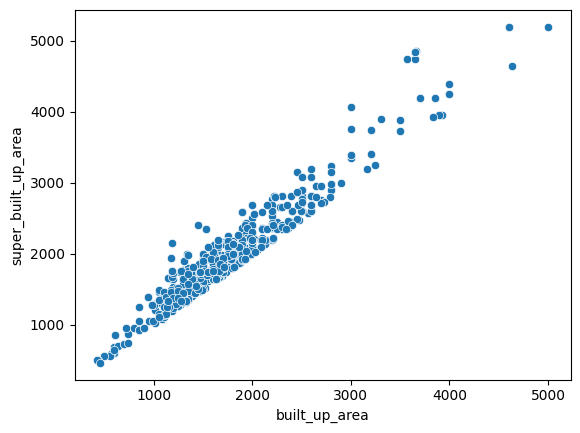

In [136]:
sns.scatterplot(data=df,x='built_up_area',y='super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

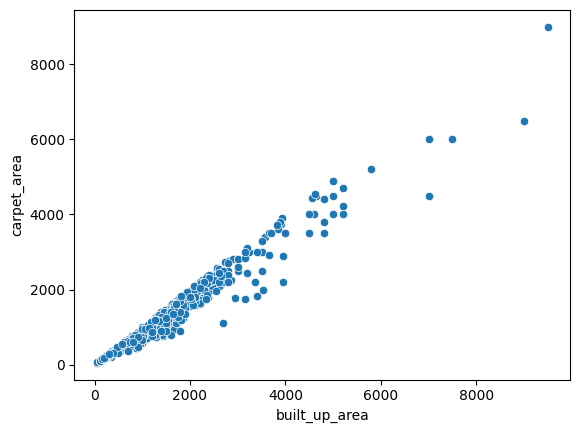

In [137]:
sns.scatterplot(data=df,x='built_up_area',y='carpet_area')

In [138]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3551    False
3552    False
3553    False
3554    False
3555    False
Length: 3556, dtype: bool

In [139]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [140]:
all_present_df.shape

(531, 24)

In [141]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [142]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [143]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [144]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [145]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
15,flat,mapsko royale ville,sector 82,1.12,6257.0,1790.0,Super Built up area 1790(166.3 sq.m.)Carpet ar...,3.0,3.0,2,12.0,North-East,Relatively New,1790.0,NaN,1400.0,0,0,0,1,0,0,49,596.666667
19,flat,shapoorji pallonji joyville gurugram,sector 102,1.99,20665.0,963.0,Super Built up area 1349(125.33 sq.m.)Carpet a...,2.0,2.0,2,14.0,South,New Property,1349.0,NaN,963.0,0,0,0,0,0,0,152,481.500000
24,flat,ss the leaf,sector 85,1.15,10017.0,1148.0,Super Built up area 1640(152.36 sq.m.)Carpet a...,2.0,2.0,3+,18.0,East,Relatively New,1640.0,NaN,1148.0,0,0,1,0,0,0,156,574.000000
32,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,5.0,3+,22.0,West,Relatively New,2905.0,NaN,2495.0,0,1,0,0,0,2,174,623.750000
34,flat,ats triumph,sector 104,2.55,13077.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4.0,4.0,3+,21.0,East,Relatively New,3150.0,NaN,1950.0,0,1,0,0,0,0,150,487.500000


In [146]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_13096\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_13096\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [147]:
df.update(sbc_df)

In [148]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1681
built_up_area          1548
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [149]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [150]:
sb_df.shape

(875, 24)

In [151]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,suncity heights,sector 54,3.85,16446.0,2341.0,Super Built up area 2341(217.49 sq.m.),3.0,3.0,3+,8.0,NaN,Old Property,2341.0,NaN,NaN,0,1,0,0,0,0,67,780.333333
10,flat,dlf carlton estate,sector 43,2.10,15419.0,1362.0,Super Built up area 1362(126.53 sq.m.),3.0,3.0,1,2.0,East,Old Property,1362.0,NaN,NaN,0,0,1,0,0,2,88,454.000000
14,flat,the close north,sector 50,2.70,9982.0,2705.0,Super Built up area 2605(242.01 sq.m.),3.0,3.0,3+,3.0,South,Moderately Old,2605.0,NaN,NaN,0,1,0,0,0,0,117,901.666667
23,flat,microtek greenburg,sector 86,1.30,8754.0,1485.0,Super Built up area 1480(137.5 sq.m.),2.0,2.0,3,10.0,NaN,Relatively New,1480.0,NaN,NaN,1,0,0,0,0,0,38,742.500000
33,flat,rose apartment,sector 28,3.00,10482.0,2862.0,Super Built up area 2862(265.89 sq.m.),3.0,5.0,3+,8.0,NaN,Old Property,2862.0,NaN,NaN,0,0,0,0,0,0,0,954.000000


In [152]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_13096\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_13096\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_a

In [153]:
df.update(sb_df)

In [154]:
df.shape

(3556, 24)

In [155]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1681
built_up_area           673
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [156]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [157]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
9,flat,deepak minda,manesar,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3.0,3.0,3+,6.0,North-West,Moderately Old,NaN,NaN,2650.0,0,1,0,0,0,0,7,883.333333
11,flat,viridian the plaza 106,sector 106,0.46,6571.0,700.0,Carpet area: 700 (65.03 sq.m.),1.0,1.0,1,18.0,NaN,New Property,NaN,NaN,700.0,0,0,0,0,0,0,104,700.000000
13,flat,orchid island,sector 51,1.70,10652.0,1596.0,Carpet area: 1596 (148.27 sq.m.),3.0,4.0,3,2.0,West,Moderately Old,NaN,NaN,1596.0,0,0,1,1,0,0,90,532.000000
17,flat,birla navya,sector 63a,3.15,14631.0,2153.0,Carpet area: 200,3.0,3.0,3,4.0,East,Undefined,NaN,NaN,200.0,0,0,0,0,1,0,44,717.666667
18,flat,prime habitat,sector 99a,0.27,5433.0,497.0,Carpet area: 497 (46.17 sq.m.),2.0,2.0,1,4.0,North-East,New Property,NaN,NaN,497.0,0,0,0,0,0,0,7,248.500000


In [158]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_13096\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_13096\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(

In [159]:
df.update(c_df)

In [160]:
df.shape

(3556, 24)

In [161]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1681
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

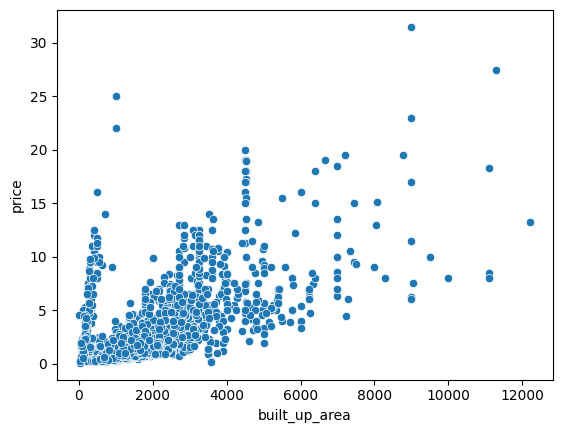

In [162]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [163]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [164]:
anamoly_df.sample(5)

,price,area,built_up_area
1421,3.69,1557.0,1557.0
148,2.65,1400.0,1800.0
1263,12.00,3240.0,400.0
1739,9.50,4050.0,500.0
987,6.50,1800.0,1800.0


In [165]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [166]:
df.update(anamoly_df)

In [167]:
df.shape

(3556, 24)

<Axes: xlabel='built_up_area', ylabel='price'>

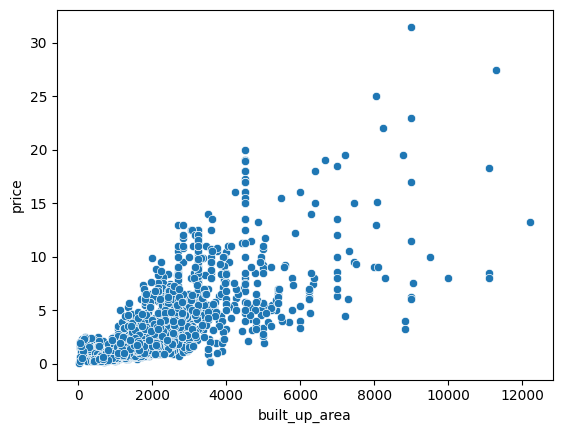

In [168]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [169]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [170]:
df.shape

(3556, 19)

In [171]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,4.0,4.0,3,1.0,NaN,Relatively New,1600.0,1,0,0,0,1,0,42
1,house,puri diplomatic greens,sector 111,9.00,11250.0,5.0,5.0,3+,3.0,North-East,Relatively New,8000.0,0,1,0,0,0,0,112
2,flat,m3m skywalk,sector 74,2.25,12500.0,3.0,3.0,3,5.0,North-East,Relatively New,1900.0,1,0,0,0,0,0,174
3,house,independent,sector 55,5.60,20741.0,6.0,4.0,3,3.0,East,Old Property,2700.0,0,1,0,0,0,2,41
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,4.0,4.0,3+,3.0,West,Moderately Old,540.0,1,1,0,1,1,1,123


In [172]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [173]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
645,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
743,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
878,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1038,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
1058,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1416,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1491,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1712,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
2183,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2227,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0


In [174]:
df[df['property_type'] == 'house']['floorNum']

1       3.0
3       3.0
4       3.0
5       2.0
8       2.0
       ... 
3538    1.0
3540    2.0
3541    3.0
3544    2.0
3551    3.0
Name: floorNum, Length: 750, dtype: float64

In [175]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\pradeep dubey\AppData\Local\Temp\ipykernel_13096\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [176]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### facing

<Axes: ylabel='count'>

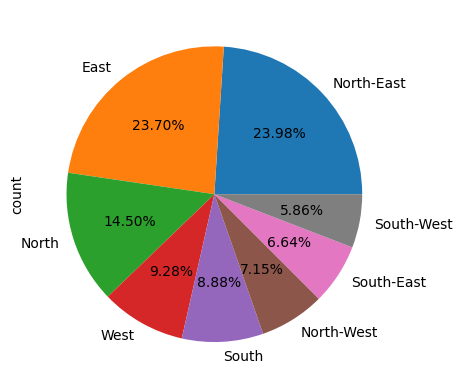

In [177]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [178]:
df.drop(columns=['facing'],inplace=True)

In [179]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2407,flat,ss the leaf,sector 85,1.98,8257.0,3.0,4.0,3,12.0,Relatively New,2399.0,0,0,1,0,0,0,174
2117,flat,sare homes,sector 92,0.50,4237.0,3.0,3.0,2,1.0,Relatively New,1068.0,0,0,0,0,0,0,26
2642,flat,sidhartha ncr one,sector 95,0.55,5556.0,2.0,2.0,3,15.0,Undefined,990.0,0,0,0,0,0,0,0
2322,flat,signature global solera 2,sector 107,0.50,8929.0,2.0,2.0,2,13.0,New Property,622.0,0,0,0,0,0,0,8
1675,flat,emaar mgf the palm drive,sector 66,3.50,15909.0,3.0,3.0,3,7.0,Moderately Old,2125.0,0,1,1,0,0,2,149


In [180]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3172,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [181]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [182]:
df.drop(index=[3172],inplace=True)

In [183]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [184]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Undefined              424
Old Property           293
Under Construction     131
Name: count, dtype: int64

In [185]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
17,flat,birla navya,sector 63a,3.15,14631.0,3.0,3.0,3,4.0,Undefined,2153.0,0,0,0,0,1,0,44
38,house,independent,sector 13,0.62,3588.0,6.0,6.0,0,3.0,Undefined,192.0,0,0,0,0,0,0,0
46,flat,godrej nature plus,sector 33,1.15,11558.0,2.0,2.0,2,15.0,Undefined,103.0,0,0,0,0,0,0,38
48,flat,smart world gems,sector 89,0.90,8145.0,2.0,2.0,2,1.0,Undefined,1105.0,0,0,0,0,0,0,45
51,flat,senate court,sector 62,0.90,14085.0,1.0,1.0,0,0.0,Undefined,639.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,flat,signature global the millennia 3,sector 37d,0.45,7627.0,2.0,3.0,2,8.0,Undefined,656.0,0,0,0,0,0,0,8
3533,flat,bptp terra,sector 37d,1.95,14444.0,4.0,3.0,3,7.0,Undefined,1650.0,0,0,0,0,0,0,53
3534,flat,dlf icon,sector 43,5.80,20707.0,4.0,4.0,3+,18.0,Undefined,2801.0,0,0,0,0,0,0,0
3539,flat,signature global park,sohna road,0.87,7190.0,3.0,2.0,3,4.0,Undefined,1210.0,0,0,0,0,0,0,58


In [186]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [187]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [188]:
df['agePossession'].value_counts()

agePossession
Relatively New        1783
New Property           634
Moderately Old         586
Old Property           329
Under Construction     133
Undefined               90
Name: count, dtype: int64

In [189]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [190]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [191]:
df['agePossession'].value_counts()

agePossession
Relatively New        1796
New Property           658
Moderately Old         593
Old Property           340
Under Construction     133
Undefined               35
Name: count, dtype: int64

In [192]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [193]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [194]:
df['agePossession'].value_counts()

agePossession
Relatively New        1808
New Property           658
Moderately Old         616
Old Property           340
Under Construction     133
Name: count, dtype: int64

In [195]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [196]:
import os

# Define the absolute path to the processed data folder
data_path = r"C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering"

# Create the directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

# Assuming df is already defined, save the DataFrame to the specified path
df.to_csv(os.path.join(data_path, "gurgaon_properties_missing_value_imputation.csv"), index=False)


In [197]:
df.shape

(3555, 18)